In [ ]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
country_data=pd.read_csv('Country-data.csv')

In [ ]:
country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


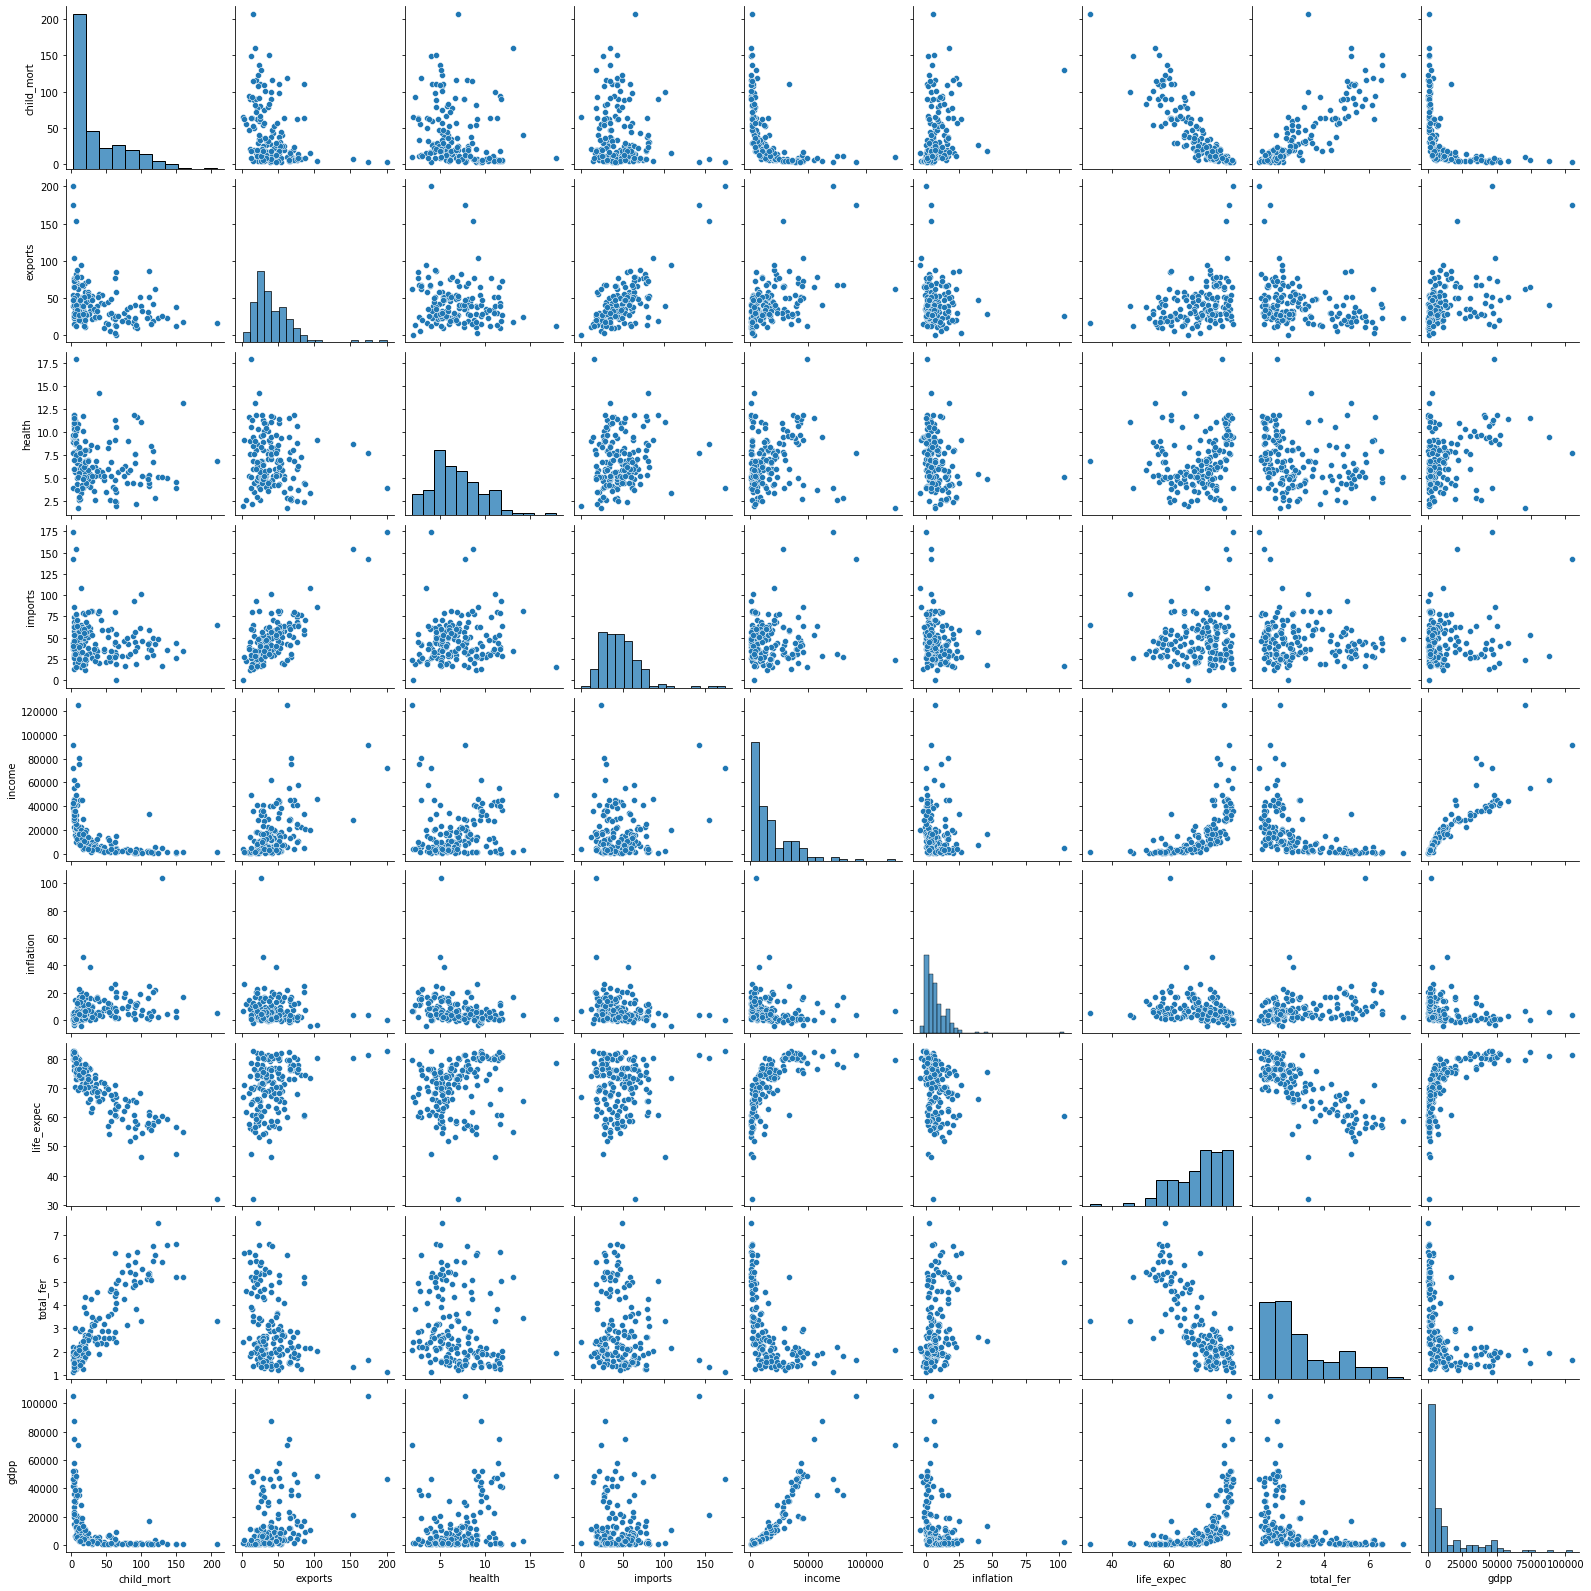

In [ ]:
sns.pairplot(country_data)

In [ ]:
px.scatter(data_frame=country_data, x='exports', y='imports',size='gdpp',text='country',  color='gdpp', title='Countries by Export & Import and corresponding GDP')

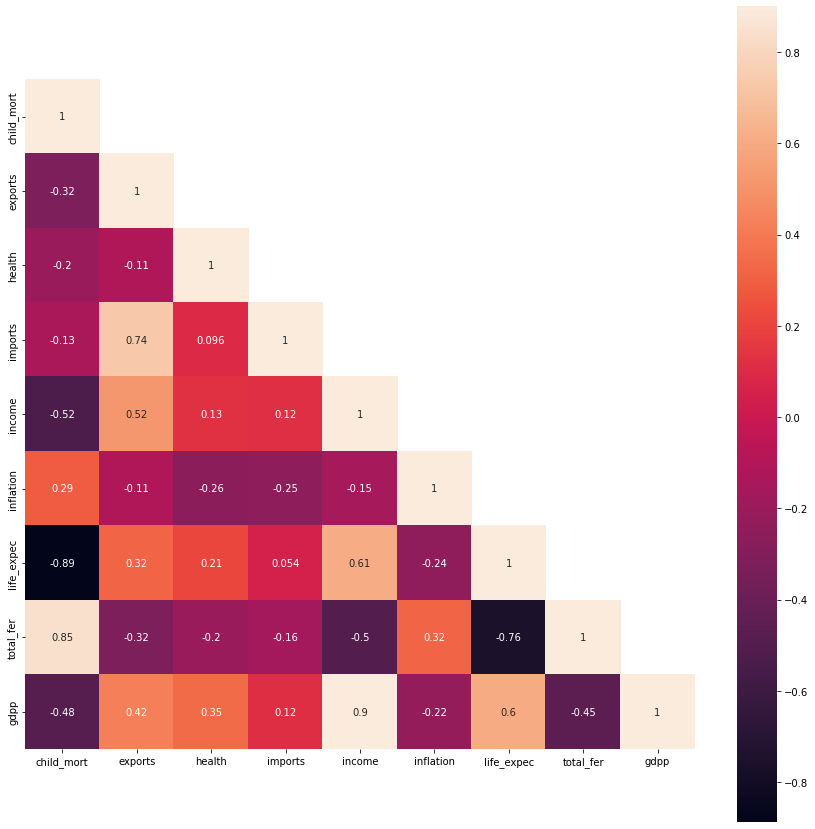

In [ ]:
#create correlation
corr = country_data.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

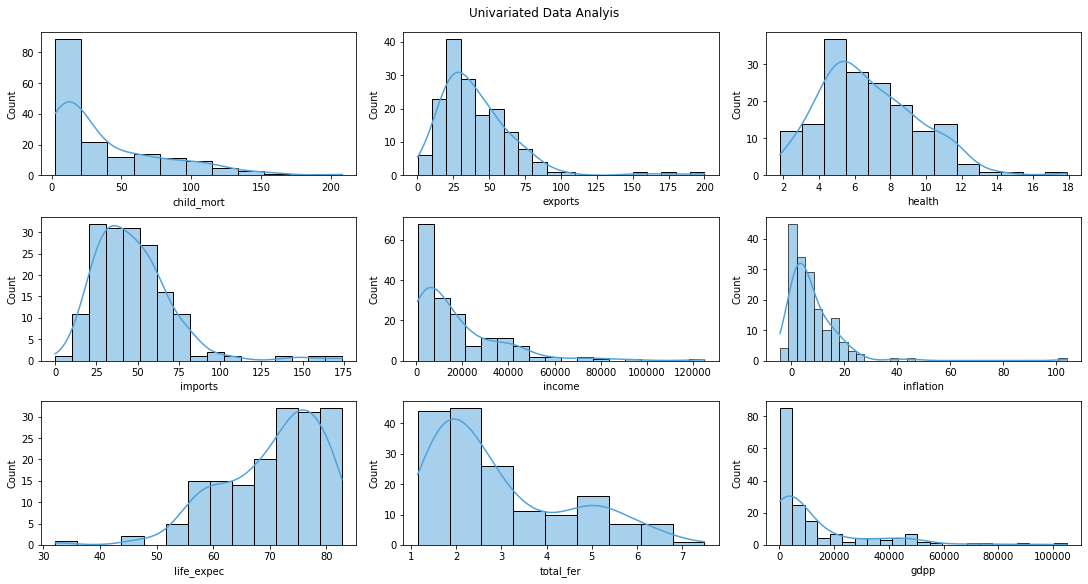

In [ ]:
colors = ['#DB1C18','#DBDB3B','#51A2DB']
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
# print(fig)
ax=ax.flatten()
# print(ax)
int_cols= country_data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(country_data[i], ax=ax[x], kde=True, color=colors[2])

In [ ]:
from sklearn.preprocessing import StandardScaler
country_data_scaled = StandardScaler().fit_transform(country_data.drop(['country'], axis=1))

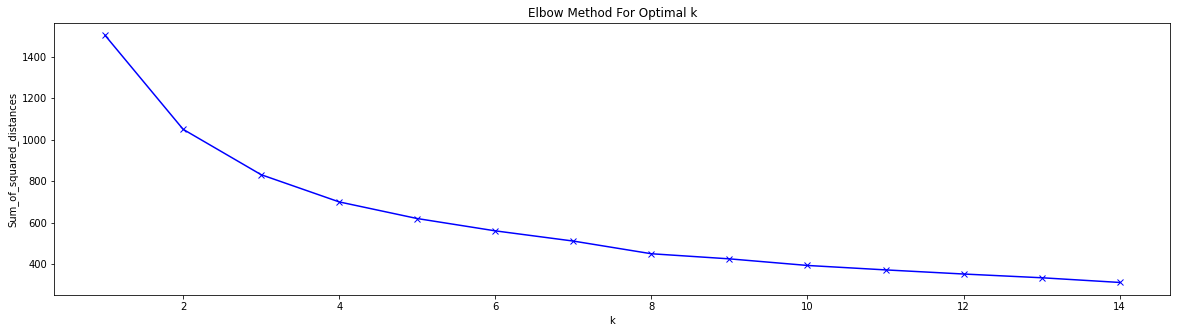

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(country_data_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

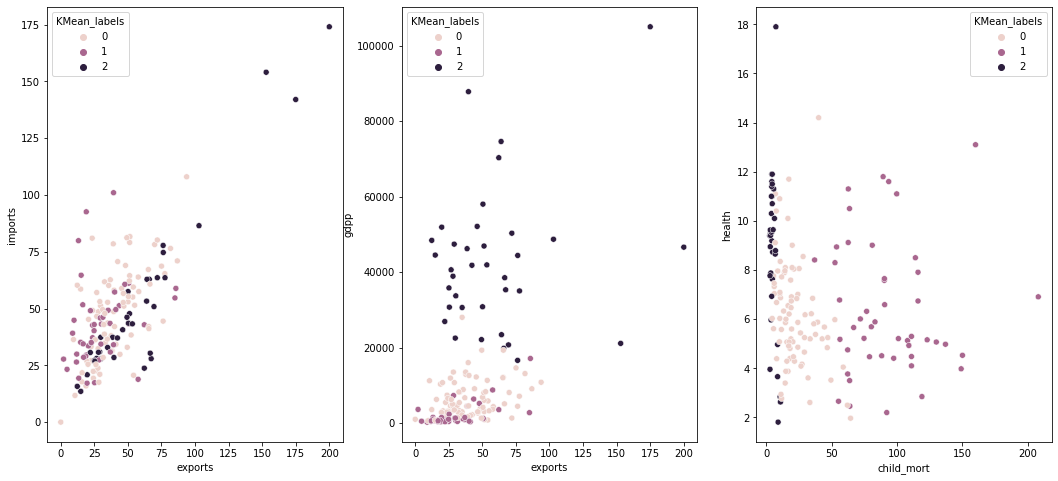

In [ ]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(country_data_scaled)
country_data['KMean_labels']=model.labels_
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
sns.scatterplot(data=country_data, x='exports', y='imports', hue='KMean_labels', ax=ax[0])
sns.scatterplot(data=country_data, x='exports', y='gdpp', hue='KMean_labels', ax=ax[1])
sns.scatterplot(data=country_data, x='child_mort', y='health', hue='KMean_labels', ax=ax[2])

In [ ]:
country_data.groupby(['KMean_labels','country']).mean(3)

child_mort  exports  ...  total_fer   gdpp
KMean_labels country                                    ...                  
0            Albania                     16.6     28.0  ...       1.65   4090
             Algeria                     27.3     38.4  ...       2.89   4460
             Antigua and Barbuda         10.3     45.5  ...       2.13  12200
             Argentina                   14.5     18.9  ...       2.37  10300
             Armenia                     18.1     20.8  ...       1.69   3220
...                                       ...      ...  ...        ...    ...
2            Sweden                       3.0     46.2  ...       1.98  52100
             Switzerland                  4.5     64.0  ...       1.52  74600
             United Arab Emirates         8.6     77.7  ...       1.87  35000
             United Kingdom               5.2     28.2  ...       1.92  38900
             United States                7.3     12.4  ...       1.93  48400

[167 rows x 9 columns]

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(country_data_scaled,labels=model.labels_)

0.28329575683463126